In [1]:
import numpy as np

x = [-1.11, -6.10, 2.42]
y = [-2.29, -2.91]
N = 10000
beta = 0.95
h = 0
h_wawe = np.mean(x) - np.mean(y)

delta = h_wawe - h

delta = []
for _ in range(N):
    bootstrap_x = np.random.choice(x, size=len(x), replace=True)
    bootstrap_y = np.random.choice(y, size=len(y), replace=True)
    delta.append(np.mean(bootstrap_x) - np.mean(bootstrap_y) - h_wawe)

var_row = sorted(delta)

b = h_wawe - var_row[int(N * (1 - beta))]

print("Доверительный интервал: h < ", b)

Доверительный интервал: h <  4.153333333333333


## Нет оснований отвергнуть гипотезу H0

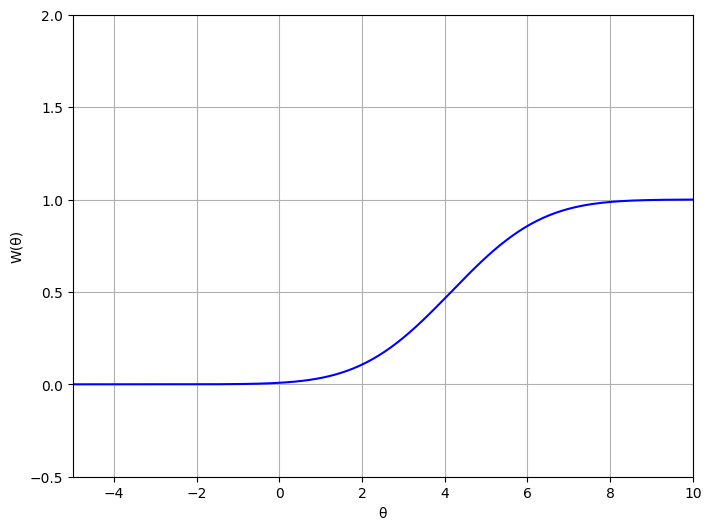

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def F_theta(t):
  return 1 - norm.cdf(b, loc=t, scale=np.sqrt(3))

thetas = np.linspace(-5, 10, 200)

F_values = [F_theta(theta) for theta in thetas]

plt.figure(figsize=(8, 6))
plt.plot(thetas, F_values, color='b')
plt.xlabel("θ")
plt.ylabel("W(θ)")
plt.grid(True)
plt.xlim(-5, 10)
plt.ylim(-0.5, 2)
plt.show()